In [48]:
#Dependencies 
import pandas as pd
from matplotlib import pyplot as plt
import sqlalchemy as db
from sqlalchemy import create_engine
from sqlalchemy import MetaData, Table
from engine import engines
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session

In [38]:
#Connect postgres database
engine = create_engine(engines)
connection = engine.connect()

In [39]:
#Print table names
print(engine.table_names())

['departments', 'dept_manager', 'titles', 'employees', 'dept_emp', 'salaries']


In [40]:
#Initialize metadata object
metadata = MetaData()

In [42]:
#Set up to reflect tables
Base = automap_base()
Base.prepare(engine, reflect=True)

In [43]:
type(Session)

type

In [31]:
#Convert table to df? 
type(salary)

sqlalchemy.sql.schema.Table

In [44]:
#Read salary table
salaries = pd.read_sql('salaries', engine)

In [57]:
#Read titles table
titles = pd.read_sql('titles', engine)

In [60]:
#Read employees table
employees = pd.read_sql('employees', engine)

In [78]:
#Join employees and titles table
employees_title = pd.merge(employees, titles, on = 'title_id')
employees_title.head()

,emp_no,title_id,birth_date,first_name,last_name,sex,hire_date,emp_title
0,473302,s0001,7/25/1953,Hideyuki,Zallocco,M,4/28/1990,Staff
1,421786,s0001,9/28/1957,Xiong,Verhoeff,M,11/26/1987,Staff
2,273487,s0001,4/14/1957,Christoph,Parfitt,M,6/28/1991,Staff
3,246449,s0001,3/23/1958,Subbu,Bultermann,F,3/25/1988,Staff
4,48085,s0001,1/19/1964,Venkatesan,Gilg,M,6/28/1993,Staff


In [80]:
#Join employees_title table 
emp_title_salary = pd.merge(employees_title, salaries, on = 'emp_no')
emp_title_salary.head()

,emp_no,title_id,birth_date,first_name,last_name,sex,hire_date,emp_title,salary
0,473302,s0001,7/25/1953,Hideyuki,Zallocco,M,4/28/1990,Staff,40000
1,421786,s0001,9/28/1957,Xiong,Verhoeff,M,11/26/1987,Staff,40000
2,273487,s0001,4/14/1957,Christoph,Parfitt,M,6/28/1991,Staff,56087
3,246449,s0001,3/23/1958,Subbu,Bultermann,F,3/25/1988,Staff,87084
4,48085,s0001,1/19/1964,Venkatesan,Gilg,M,6/28/1993,Staff,63016


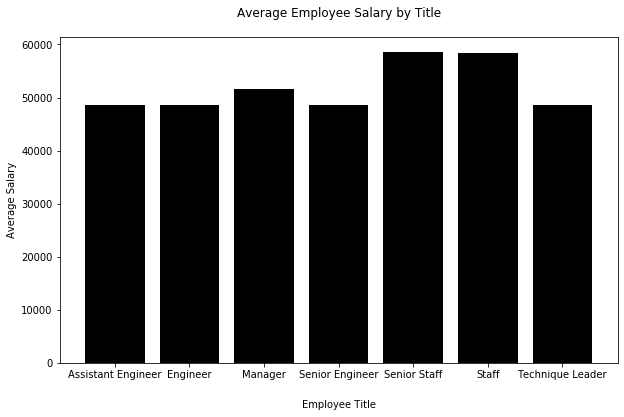

In [114]:
#Make groupby object to graph average salary by title
salary_title = emp_title_salary.groupby('emp_title').mean()['salary']
salary_title = salary_title.reset_index()
plt.figure(figsize = (10,6))
plt.bar(salary_title.emp_title, salary_title.salary, color = 'black')
plt.xlabel('Employee Title', labelpad = 20)
plt.ylabel('Average Salary')
plt.title('Average Employee Salary by Title', pad = 20)
plt.savefig('emp_salary_by_title.png')

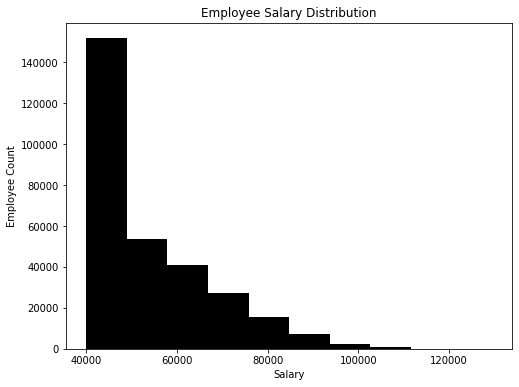

In [105]:
#Salary Distribution Histogram
plt.figure(figsize = (8,6))
plt.hist(salaries['salary'], color = 'black')
plt.xlabel('Salary')
plt.ylabel('Employee Count')
plt.title('Employee Salary Distribution')
plt.savefig('emp_salary_distr.png')
plt.show()